In [1]:
# std
import os
import sys
import re

# 3rd party
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# get connected to the database
connection = pg.connect(user='scientist',
                        password='******',
                        host='127.0.01',
                        port='5432',
                        database='tensor_factorisation_wn18rr')

In [3]:
entity = psql.read_sql("SELECT * FROM entity", connection)
entity.head()

,synset_id,name,pos_tag,sense_index,definition
0,14854262,stool,NN,2,solid excretory product evacuated from the bowels
1,00590383,chieftainship,NN,1,the position of chieftain
2,08769179,saxony,NN,1,an area in Germany around the upper Elbe river...
3,02338145,ondatra zibethica,NN,1,beaver-like aquatic rodent of North America wi...
4,01990168,founder,VB,2,sink below the surface


In [4]:
entity.count()

synset_id      40943
name           40943
pos_tag        40943
sense_index    40943
definition     40943
dtype: int64

In [5]:
entity_counts = entity.count().to_frame()
entity_counts.head()

,0
synset_id,40943
name,40943
pos_tag,40943
sense_index,40943
definition,40943


In [6]:
entity_counts = entity_counts.reset_index()
entity_counts.head()

,index,0
0,synset_id,40943
1,name,40943
2,pos_tag,40943
3,sense_index,40943
4,definition,40943


In [7]:
entity_counts = entity_counts.rename(columns={'index': 'label', 0: 'value'})
entity_counts.head()

,label,value
0,synset_id,40943
1,name,40943
2,pos_tag,40943
3,sense_index,40943
4,definition,40943


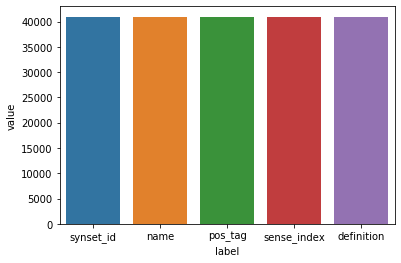

In [8]:
ax = sns.barplot(x="label", y="value", data=entity_counts)

In [9]:
relation = psql.read_sql("SELECT * FROM relation", connection)
relation.head()

,id,name
0,19,derivationally related form
1,20,verb group
2,21,instance hypernym
3,22,also see
4,23,synset domain topic of


In [10]:
relation_counts = relation.count().to_frame()
relation_counts.head()

,0
id,11
name,11


In [11]:
relation_counts = relation_counts.reset_index()
relation_counts.head()

,index,0
0,id,11
1,name,11


In [12]:
relation_counts = relation_counts.rename(columns={'index': 'label', 0: 'value'})
relation_counts.head()

,label,value
0,id,11
1,name,11


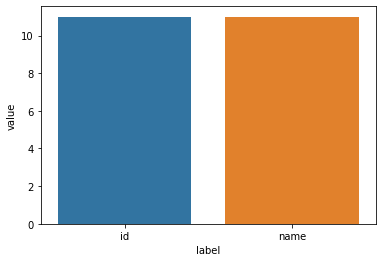

In [13]:
ax = sns.barplot(x="label", y="value", data=relation_counts)

In [14]:
triple = psql.read_sql("SELECT * FROM train UNION SELECT * FROM valid UNION SELECT * FROM test", connection)
triple.head()

,id,subject,predicate,object
0,1,00260881,hypernym,00260622
1,1,02174461,hypernym,02176268
2,1,06845599,member of domain usage,03754979
3,2,00789448,verb group,01062739
4,2,01332730,derivationally related form,03122748


In [15]:
triple_counts = triple.count().to_frame()
triple_counts.head()

,0
id,93003
subject,93003
predicate,93003
object,93003


In [16]:
triple_counts = triple_counts.reset_index()
triple_counts.head()

,index,0
0,id,93003
1,subject,93003
2,predicate,93003
3,object,93003


In [17]:
triple_counts = triple_counts.rename(columns={'index': 'label', 0: 'value'})
triple_counts.head()

,label,value
0,id,93003
1,subject,93003
2,predicate,93003
3,object,93003


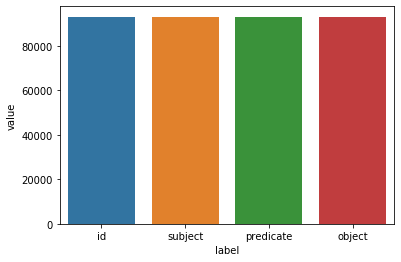

In [18]:
ax = sns.barplot(x="label", y="value", data=triple_counts)

In [19]:
triple_entity_relation_counts = pd.DataFrame([triple_counts.loc[0, 'value'], 
                                              entity_counts.loc[0, 'value'], 
                                              relation_counts.loc[0, 'value']], index=['triple', 'entity', 'relation'])
triple_entity_relation_counts.head()

,0
triple,93003
entity,40943
relation,11


In [20]:
triple_entity_relation_counts = triple_entity_relation_counts.reset_index()
triple_entity_relation_counts.head()

,index,0
0,triple,93003
1,entity,40943
2,relation,11


In [21]:
triple_entity_relation_counts = triple_entity_relation_counts.rename(columns={'index': 'label', 0: 'value'})
triple_entity_relation_counts.head()

,label,value
0,triple,93003
1,entity,40943
2,relation,11


In [22]:
tmp = triple_entity_relation_counts.iloc[0]
triple_entity_relation_counts.iloc[0] = triple_entity_relation_counts.iloc[1]
triple_entity_relation_counts.iloc[1] = triple_entity_relation_counts.iloc[2]
triple_entity_relation_counts.iloc[2] = tmp
triple_entity_relation_counts

,label,value
0,entity,40943
1,relation,11
2,triple,93003


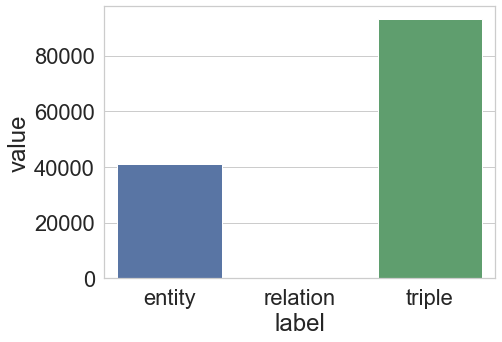

In [23]:
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid", font_scale=2) 
ax = sns.barplot(x="label", y="value", data=triple_entity_relation_counts)
plt.savefig('WN18RR_Counts.png', bbox_inches = "tight", format='PNG')

In [24]:
fact = psql.read_sql("SELECT * FROM fact_train UNION SELECT * FROM fact_valid UNION SELECT * FROM fact_test", connection)
fact.head()

,id,subject,s_name,predicate,object,o_name
0,1,00260881,land reform,hypernym,00260622,reform
1,1,02174461,clangour,hypernym,02176268,sound
2,1,06845599,trade name,member of domain usage,03754979,metharbital
3,2,00789448,telephone,verb group,01062739,call
4,2,01332730,cover,derivationally related form,03122748,covering


In [25]:
fact = fact.set_index('id')
fact.head()

,subject,s_name,predicate,object,o_name
id,,,,,
1,00260881,land reform,hypernym,00260622,reform
1,02174461,clangour,hypernym,02176268,sound
1,06845599,trade name,member of domain usage,03754979,metharbital
2,00789448,telephone,verb group,01062739,call
2,01332730,cover,derivationally related form,03122748,covering


In [26]:
predicate_counts = fact['predicate'].value_counts(dropna=False)
predicate_counts.head(50)

hypernym                       37221
derivationally related form    31867
member meronym                  7928
has part                        5142
synset domain topic of          3335
instance hypernym               3150
also see                        1396
verb group                      1220
member of domain region          983
member of domain usage           675
similar to                        86
Name: predicate, dtype: int64

In [27]:
predicate_counts.index

Index(['hypernym', 'derivationally related form', 'member meronym', 'has part',
       'synset domain topic of', 'instance hypernym', 'also see', 'verb group',
       'member of domain region', 'member of domain usage', 'similar to'],
      dtype='object')

In [28]:
predicate_counts = predicate_counts.reset_index()
predicate_counts.head(50)

,index,predicate
0,hypernym,37221
1,derivationally related form,31867
2,member meronym,7928
3,has part,5142
4,synset domain topic of,3335
5,instance hypernym,3150
6,also see,1396
7,verb group,1220
8,member of domain region,983
9,member of domain usage,675


In [29]:
predicate_counts = predicate_counts.rename(columns={'index': 'label', 'predicate': 'value'})
predicate_counts.head()

,label,value
0,hypernym,37221
1,derivationally related form,31867
2,member meronym,7928
3,has part,5142
4,synset domain topic of,3335


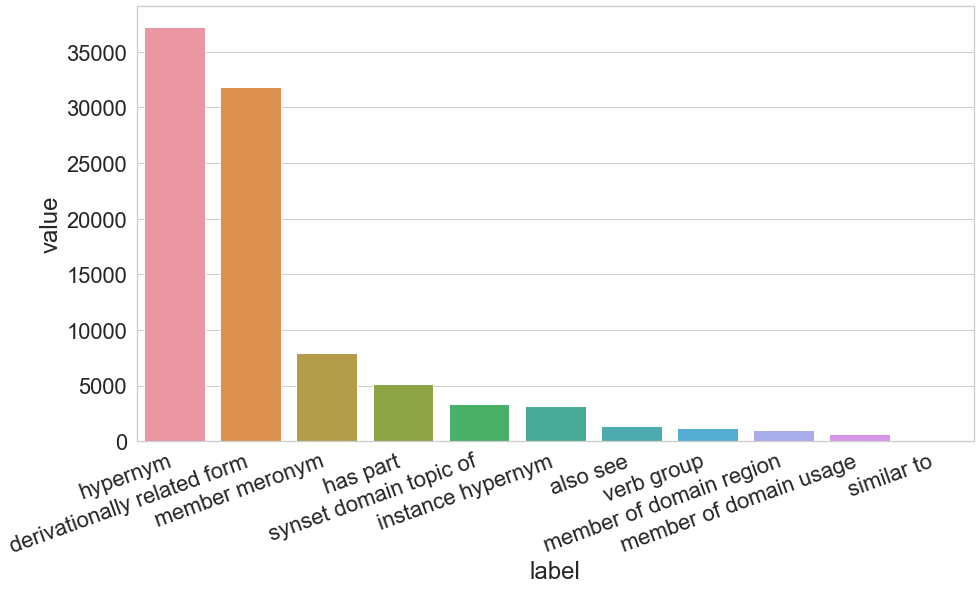

In [30]:
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid", font_scale=2) 
ax = sns.barplot(x="label", y="value", data=predicate_counts[:50])
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.savefig('WN18RR_Predicate_Counts.png', bbox_inches = "tight", format='PNG')

In [31]:
predicate_counts.count(), predicate_counts.max(), predicate_counts.min(), predicate_counts.median()

(label    11
 value    11
 dtype: int64, label    verb group
 value         37221
 dtype: object, label    also see
 value          86
 dtype: object, value    3150.0
 dtype: float64)

In [32]:
# Computing IQR
Q1 = predicate_counts.quantile(0.25)
Q3 = predicate_counts.quantile(0.75)
IQR = Q3 - Q1
IQR

value    5433.5
dtype: float64

In [33]:
object_counts = fact['o_name'].value_counts(dropna=False).to_frame()
object_counts.head(50)

,o_name
urban center,514
soul,410
war machine,364
law,307
asterid dicot genus,305
bird genus,294
modify,283
mammal genus,264
rosid dicot genus,254
herbaceous plant,249


In [34]:
object_counts.index

Index(['urban center', 'soul', 'war machine', 'law', 'asterid dicot genus',
       'bird genus', 'modify', 'mammal genus', 'rosid dicot genus',
       'herbaceous plant',
       ...
       'sailing vessel', 'lucubration', 'webbing', 'familiar', 'treasurer',
       'self-renunciation', 'tai', 'phenelzine', 'beastliness',
       'pleasure seeker'],
      dtype='object', length=26162)

In [35]:
object_counts = object_counts.reset_index()
object_counts.head()

,index,o_name
0,urban center,514
1,soul,410
2,war machine,364
3,law,307
4,asterid dicot genus,305


In [36]:
object_counts = object_counts.rename(columns={'index': 'label', 'o_name': 'value'})
object_counts.head()

,label,value
0,urban center,514
1,soul,410
2,war machine,364
3,law,307
4,asterid dicot genus,305


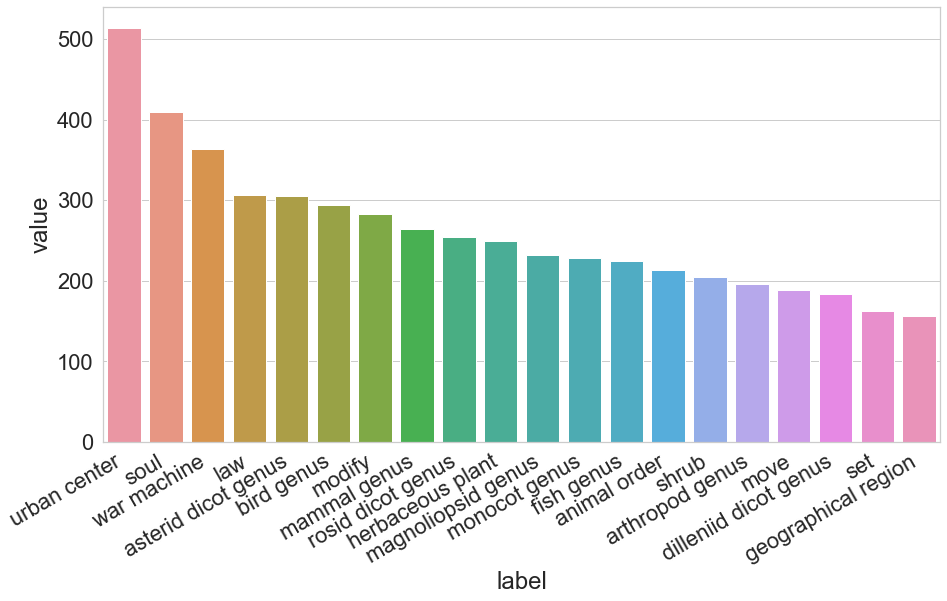

In [37]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.barplot(x="label", y="value", data=object_counts[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.savefig('WN18RR_Object_Counts.png', bbox_inches = "tight", format='PNG')

In [38]:
object_counts.count(), object_counts.max(), object_counts.min(), object_counts.median()

(label    26162
 value    26162
 dtype: int64, label    zymotic
 value        514
 dtype: object, label    'hood
 value        1
 dtype: object, value    1.0
 dtype: float64)

In [39]:
# Computing IQR
Q1 = object_counts.quantile(0.25)
Q3 = object_counts.quantile(0.75)
IQR = Q3 - Q1
IQR

value    2.0
dtype: float64

In [40]:
subject_counts = fact['s_name'].value_counts().to_frame()
subject_counts.head()

,s_name
united kingdom of great britain and northern ireland,494
trade name,245
family compositae,177
usa,157
plural form,124


In [41]:
subject_counts.index

Index(['united kingdom of great britain and northern ireland', 'trade name',
       'family compositae', 'usa', 'plural form', 'run', 'play', 'take', 'set',
       'subfamily papilionoideae',
       ...
       'nazi', 'castor bean', 'oxalis pes-caprae', 'prickly heat', 'doorframe',
       'family atropidae', 'true pepper', 'serving cart', 'willpower',
       'water ice'],
      dtype='object', length=32349)

In [42]:
subject_counts = subject_counts.reset_index()
subject_counts.head()

,index,s_name
0,united kingdom of great britain and northern i...,494
1,trade name,245
2,family compositae,177
3,usa,157
4,plural form,124


In [43]:
subject_counts = subject_counts.rename(columns={'index': 'label', 's_name': 'value'})
subject_counts.head()

,label,value
0,united kingdom of great britain and northern i...,494
1,trade name,245
2,family compositae,177
3,usa,157
4,plural form,124


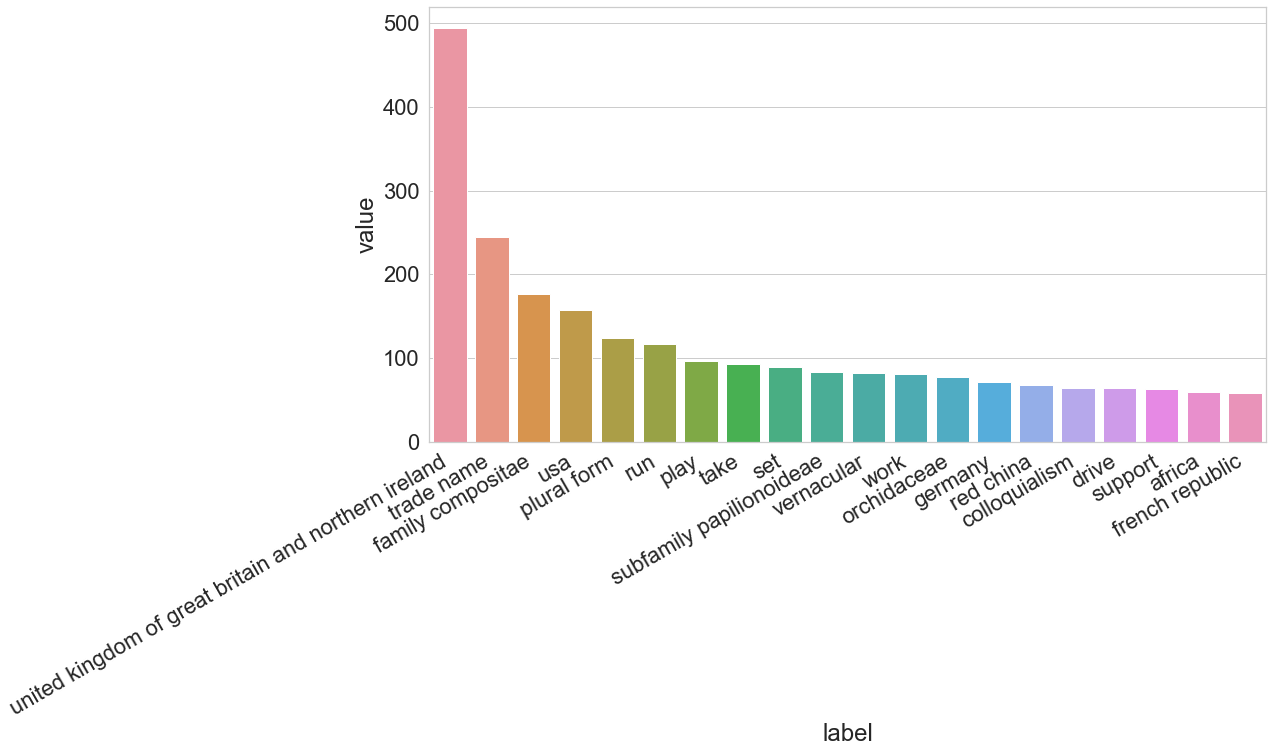

In [44]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.barplot(x="label", y="value", data=subject_counts[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.savefig('WN18RR_Subject_Counts.png', bbox_inches = "tight", format='PNG')

In [45]:
subject_counts.count(), subject_counts.max(), subject_counts.min(), subject_counts.median()

(label    32349
 value    32349
 dtype: int64, label    zymotic
 value        494
 dtype: object, label    'hood
 value        1
 dtype: object, value    2.0
 dtype: float64)

In [46]:
# Computing IQR
Q1 = subject_counts.quantile(0.25)
Q3 = subject_counts.quantile(0.75)
IQR = Q3 - Q1
IQR

value    2.0
dtype: float64